In [16]:
import torch as th
from torchvision import datasets, transforms

epochs = 20
batch_size = 64
learning_rate = 1e-2
momentum = 0.9
neuron_counts = [4, 8, 16, 32, 64, 128, 256]

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = th.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = th.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

print("Number of training samples:", len(train_dataset))
print("Number of testing samples:", len(test_dataset))

Number of training samples: 60000
Number of testing samples: 10000


In [14]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt 

class MLP(nn.Module):
    def __init__(self, hidden_size=128):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [5]:
def train_and_evaluate(hidden_size):
    device = th.device('cuda' if th.cuda.is_available
                       () else 'cpu')
    mlp = MLP(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mlp.parameters(), lr=learning_rate, momentum=momentum)

    for epoch in range(epochs):
        mlp.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = mlp(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        mlp.eval()
        correct = 0
        total = 0
        with th.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = mlp(images)
                _, predicted = th.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        return accuracy

Training with hidden layer size: 4
Accuracy: 56.16%
Training with hidden layer size: 8
Accuracy: 86.89%
Training with hidden layer size: 16
Accuracy: 90.70%
Training with hidden layer size: 32
Accuracy: 91.77%
Training with hidden layer size: 64
Accuracy: 92.34%
Training with hidden layer size: 128
Accuracy: 93.16%
Training with hidden layer size: 256
Accuracy: 93.32%


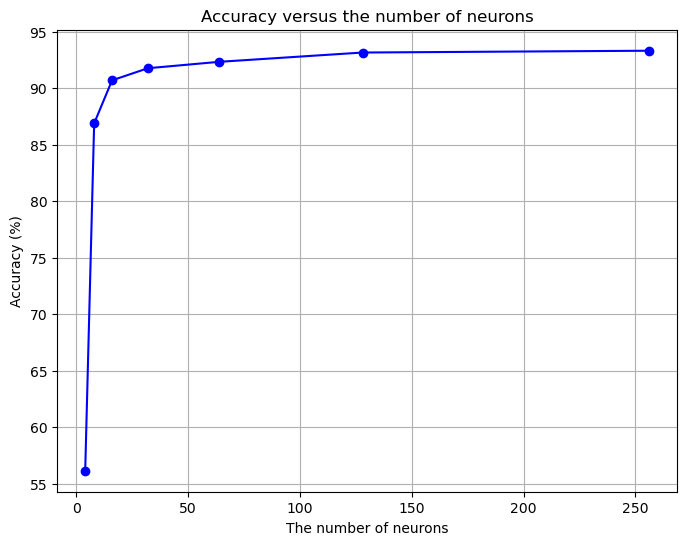

In [17]:
def main():
    accuracies = []
    neuron_counts = [4, 8, 16, 32, 64, 128, 256]

    for hidden_size in neuron_counts:
        print(f"Training with hidden layer size: {hidden_size}")
        accuracy = train_and_evaluate(hidden_size)
        print(f"Accuracy: {accuracy:.2f}%")
        accuracies.append(accuracy)

    # 绘制准确率曲线
    plt.figure(figsize=(8, 6))
    plt.plot(neuron_counts, accuracies, marker='o', linestyle='-', color='b')
    plt.title("Accuracy versus the number of neurons")
    plt.xlabel("The number of neurons")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()